In [23]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.7 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.6 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.0 MB 8.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.1/7.0 MB 7.7 MB/s eta 0:00:01
   ---------------------------- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(r"C:\Code\bachelorarbeit\models\results.2026-02-20_07-37-57.table.csv", sep="\t", header=[0,1,2])

In [20]:
df

tool Bachelorarbeit ILP Test               \
                         run set              run_01_01.0               
               ../models/config/                   status cputime (s)   
0  constraint_4422_priority.json                     done    1.958141   

                                                                             \
                           run_01_02.0                                        
  walltime (s) memory (MB)      status cputime (s) walltime (s) memory (MB)   
0     2.447909  828.215296        done    2.179543     2.669387  828.051456   

               ...                                                   \
  run_01_03.0  ...  run_50_21.0             run_50_22.0               
       status  ... walltime (s) memory (MB)      status cputime (s)   
0        done  ...     4.244042  827.236352        done    3.552578   

                                                                             
                           run_50_23.0                                       
  walltime (s) memory (MB)      status cputime (s) walltime (s) memory (MB)  
0     4.053877  828.092416        done    3.605282     4.107932  827.142144  

[1 rows x 4601 columns]

In [21]:
cputime_series = df.xs('cputime (s)', level=2, axis=1).iloc[0]
if isinstance(cputime_series.index, pd.MultiIndex):
    cputime_series = cputime_series.droplevel(0)
difficulties = cputime_series.index.to_series().str.split('_').str[2]
stats_by_difficulty = cputime_series.groupby(difficulties).agg(['mean', 'std'])
stats_by_difficulty

,mean,std
01.0,1.963938,0.009834
02.0,2.143390,0.011468
03.0,2.141351,0.013121
04.0,2.137622,0.012324
05.0,2.137483,0.011656
06.0,2.139061,0.013584
07.0,2.262022,0.011344
08.0,2.313197,0.010963
09.0,2.376783,0.017864
10.0,2.393774,0.021511


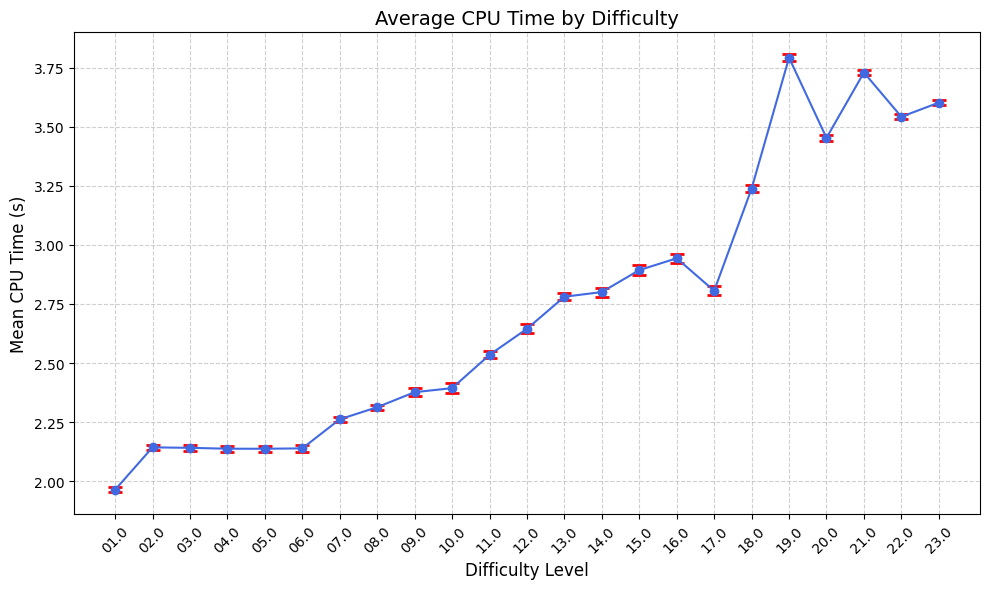

In [25]:
import matplotlib.pyplot as plt

# 1. Set the figure size to make it readable
plt.figure(figsize=(10, 6))

# 2. Create the line chart with error bars
# - fmt='-o' connects points with a line (-) and uses circular markers (o)
# - capsize=5 adds the little horizontal "caps" at the top and bottom of the error bars
plt.errorbar(
    x=stats_by_difficulty.index,        # X-axis: the difficulty levels
    y=stats_by_difficulty['mean'],      # Y-axis: the mean CPU time
    yerr=stats_by_difficulty['std'],    # Error magnitude: standard deviation
    fmt='-o',                           # Line style with markers
    capsize=5,                          # Width of the error bar caps
    capthick=2,                         # Thickness of the error bar caps
    ecolor='red',                       # Color of the error bars
    color='royalblue',                  # Color of the main line
    markersize=6                        # Size of the circular markers
)

# 3. Add titles and labels
plt.title('Average CPU Time by Difficulty', fontsize=14)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Mean CPU Time (s)', fontsize=12)

# 4. Styling for better readability
plt.xticks(rotation=45)                  # Rotate x-axis labels if there are many difficulties
plt.grid(True, linestyle='--', alpha=0.6) # Add a faint grid
plt.tight_layout()                       # Ensure nothing gets cut off

# 5. Display the plot inside the notebook
plt.show()

In [26]:
cputime_series = df.xs('memory (MB)', level=2, axis=1).iloc[0]
if isinstance(cputime_series.index, pd.MultiIndex):
    cputime_series = cputime_series.droplevel(0)
difficulties = cputime_series.index.to_series().str.split('_').str[2]
mem_by_difficulty = cputime_series.groupby(difficulties).agg(['mean', 'std'])
mem_by_difficulty

,mean,std
01.0,827.879670,0.534942
02.0,827.881964,0.441114
03.0,827.796849,0.531053
04.0,827.940782,0.478955
05.0,827.859763,0.528459
06.0,827.894088,0.510209
07.0,827.962900,0.522203
08.0,828.037693,0.501127
09.0,828.055142,0.416402
10.0,827.946435,0.465827


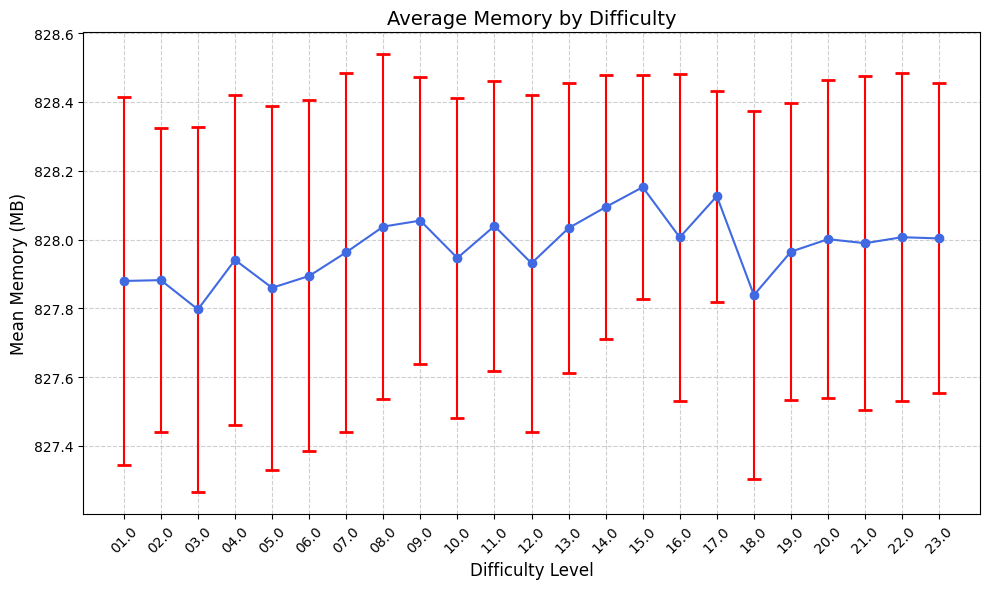

In [28]:
import matplotlib.pyplot as plt

# 1. Set the figure size to make it readable
plt.figure(figsize=(10, 6))

# 2. Create the line chart with error bars
# - fmt='-o' connects points with a line (-) and uses circular markers (o)
# - capsize=5 adds the little horizontal "caps" at the top and bottom of the error bars
plt.errorbar(
    x=mem_by_difficulty.index,        # X-axis: the difficulty levels
    y=mem_by_difficulty['mean'],      # Y-axis: the mean CPU time
    yerr=mem_by_difficulty['std'],    # Error magnitude: standard deviation
    fmt='-o',                           # Line style with markers
    capsize=5,                          # Width of the error bar caps
    capthick=2,                         # Thickness of the error bar caps
    ecolor='red',                       # Color of the error bars
    color='royalblue',                  # Color of the main line
    markersize=6                        # Size of the circular markers
)

# 3. Add titles and labels
plt.title('Average Memory by Difficulty', fontsize=14)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Mean Memory (MB)', fontsize=12)

# 4. Styling for better readability
plt.xticks(rotation=45)                  # Rotate x-axis labels if there are many difficulties
plt.grid(True, linestyle='--', alpha=0.6) # Add a faint grid
plt.tight_layout()                       # Ensure nothing gets cut off

# 5. Display the plot inside the notebook
plt.show()